**Introduction（数据选择说明）**

本次项目我们选择以 电子游戏行业（Video Game Industry） 为主题来进行数据清理与整合。选择该主题的原因如下：

    1. 电子游戏是全球规模巨大且持续增长的产业，其销售量、玩家偏好、游戏类型等数据能够反映有价值的全球趋势。

    2. 数据来源丰富且易获取（例如 Kaggle、VGChartz、Steam 数据等），非常适合进行跨来源的数据整合（Task 要求至少两个来源）。

    3. 具有公众价值（public interest）：
        游戏产业不仅在新西兰具有庞大用户规模，在全球范围内也具有重要文化与经济影响，因此可以从数据中发现趋势，例如热门平台的变化、地区销售差异等。

    4. 适合数据 wrangling：
        游戏数据往往包含缺失值、重复值、格式不一致、年份为浮点数等问题，因此非常适合作为清洗任务的练习。

因此，本项目将使用两个不同来源的数据集（其中一个为 Kaggle 的 vgsales.csv），通过清洗、对齐字段和合并流程，构建一个最终用于分析的问题驱动型数据集。



---------------------------------------------------------
项目 Task 1：数据清理（Wrangling）步骤 — 数据导入阶段
本段代码完成以下工作：
1. 导入后续分析所需的 Python 库（pandas, numpy, re）
2. 指定数据路径
3. 读取来自外部的两个数据集（vgsales.csv / hltb.jsonlines）
4. 对每个数据集做特定的数据清理 (例如：NA，missing value，多余列，等等)，为了进入分析
5. 合并2组dataset成为最终combined dataset，做后的dataset所用的column包括：game Name， genre，reviewScore，	playTime
# ---------------------------------------------------------

In [ ]:
## loading needed packages
import pandas as pd
import numpy as np
import re

Task 1: dataset 1 (vgslaes.csv) - load & clean

In [5]:
data_path = './dataset/'

## 老师 所要求的数据
vgsales = pd.read_csv(data_path + "vgsales.csv") 
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
## 只导入 所需的columns (game name, genre)
vgsales = vgsales[["Name", "Genre"]].copy()
vgsales_unique = vgsales.drop_duplicates(subset=["Name"], keep="first").reset_index(drop=True)
vgsales_unique

,Name,Genre
0,Wii Sports,Sports
1,Super Mario Bros.,Platform
2,Mario Kart Wii,Racing
3,Wii Sports Resort,Sports
4,Pokemon Red/Pokemon Blue,Role-Playing
...,...,...
11488,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,Action
11489,Eiyuu Densetsu: Sora no Kiseki Material Collec...,Role-Playing
11490,Plushees,Simulation
11491,Woody Woodpecker in Crazy Castle 5,Platform


Task 1: dataset 2 (hltb.jsonlines) - load & clean

In [6]:
## dataset 2 (hltb.jsonlines)

hltb = pd.read_json(data_path + "hltb.jsonlines", lines=True)
hltb.head()

,Name,Stats,steam_app_id,Release_date,Genres,Review_score
0,Borderlands 3,{'Additional Content': {'Moxxi's Heist of the ...,397540.0,2019-09-13,"First-Person, Action, Shooter",76
1,Dying Light,{'Additional Content': {'The Following': {'Pol...,239140.0,2015-01-27,"Action, Adventure, Open World, Survival Horror",78
2,Middle-Earth: Shadow of War,{'Additional Content': {'Blade of Galadriel': ...,356190.0,2017-10-10,"Action, Adventure",76
3,Counter-Strike: Global Offensive,"{'Multi-Player': {'Co-Op': {'Polled': '34', 'A...",730.0,2012-08-21,"First-Person, Shooter",74
4,Grand Theft Auto IV,{'Additional Content': {'The Lost and Damned':...,5152.0,2008-04-29,"Third-Person, Action, Sandbox, Shooter",82


In [ ]:
## 因为stats里包括各个平台对应的平均玩家游戏时长
## 所以我们需要从 stats 提取 每个platform 对应的 playtime 时间 作为 储备数据，用作进一步的分析
## 下面代码 只保留 platform 不为0的数据，为0会被filter out

def normalize_stats(stats):
    # 不是 dict 的情况（NaN / None）→ 返回空 dict
    if not isinstance(stats, dict):
        return {}
    
    # 有 'Platform' 包了一层：{'Platform': {'PC': {...}, 'PS4': {...}}}
    if "Platform" in stats:
        inner = stats["Platform"]
        # inner 也必须是 dict
        return inner if isinstance(inner, dict) else {}
    
    # 没有 'Platform'，但本身已经是 {'PC': {...}, 'PS4': {...}} 这种
    return stats

hltb["Stats"] = hltb["Stats"].apply(normalize_stats)
mask = hltb["Stats"].apply(lambda x: isinstance(x, dict) and len(x) > 0)
hltb = hltb[mask].reset_index(drop=True)
hltb['Stats'][0]

{'Google Stadia': {'Polled': '12',
  'Main': '28h 40m',
  'Main +': '65h 40m',
  '100%': '133h 1m',
  'Fastest': '25h',
  'Slowest': '158h'},
 'PC': {'Polled': '926',
  'Main': '22h 57m',
  'Main +': '46h 14m',
  '100%': '83h 11m',
  'Fastest': '11h 6m',
  'Slowest': '498h'},
 'PlayStation 4': {'Polled': '248',
  'Main': '23h 52m',
  'Main +': '46h 5m',
  '100%': '65h 39m',
  'Fastest': '11h 17m',
  'Slowest': '250h'},
 'PlayStation 5': {'Polled': '50',
  'Main': '25h 32m',
  'Main +': '46h 18m',
  '100%': '61h 13m',
  'Fastest': '17h 28m',
  'Slowest': '113h'},
 'Xbox One': {'Polled': '116',
  'Main': '23h 44m',
  'Main +': '51h 58m',
  '100%': '73h 22m',
  'Fastest': '12h 3m',
  'Slowest': '413h'},
 'Xbox Series X/S': {'Polled': '28',
  'Main': '22h 47m',
  'Main +': '56h 48m',
  '100%': '124h 1m',
  'Fastest': '14h 12m',
  'Slowest': '172h'}}

In [11]:
## 我们所需要用得到 platform 涉及 一下 名字 （就是 他们对应的 平均玩家时长）

target_platforms = [
    "PC",
    "PlayStation 2",
    "PlayStation 3",
    "PlayStation 4",
    "PlayStation 5",
    "Xbox One",
    "Xbox 360",
    "Xbox Series X/S",
    "Super Nintendo",
    "Wii",
    "Wii U"
]


In [9]:
## 把 提取出来的 数据 进行 格式 转换 
## e.g. 原始数据 "12h 30m"   -----  修改数据 12.5
## e.g. 原始数据 "None"      -----  修改数据 NaN
## 目的是为了 统一格式 方便 为后续 做 复杂运算 

def parse_hour_string(s):
    if not isinstance(s, str):
        return np.nan
    
    h = re.search(r"(\d+)h", s)
    m = re.search(r"(\d+)m", s)

    hours = int(h.group(1)) if h else 0
    mins = int(m.group(1)) if m else 0
    
    return round(hours + mins/60, 2)


In [12]:
### 从 Stats (column) 中提取各平台的 “Main”（主线剧情时长），并把字符串时长转换为标准小时数

def extract_main_plus(stats):
    result = {}
    for p in target_platforms:
        if p in stats and isinstance(stats[p], dict):
            main_plus = stats[p].get("Main")
            result[p] = parse_hour_string(main_plus)
        else:
            result[p] = np.nan
    return result

platform_df = hltb["Stats"].apply(extract_main_plus).apply(pd.Series)


In [13]:
## 清洗后的平台时长数据（platform_df）拼接回原 hltb 数据，形成完整的最终版本，并删除原始的 Stats 字段。
hltb_final = pd.concat([hltb, platform_df], axis=1)
del hltb_final['Stats']

In [14]:
hltb_final 

,Name,steam_app_id,Release_date,Genres,Review_score,PC,PlayStation 2,PlayStation 3,PlayStation 4,PlayStation 5,Xbox One,Xbox 360,Xbox Series X/S,Super Nintendo,Wii,Wii U
0,Borderlands 3,397540.0,2019-09-13,"First-Person, Action, Shooter",76,22.95,NaN,NaN,23.87,25.53,23.73,NaN,22.78,NaN,NaN,NaN
1,Dying Light,239140.0,2015-01-27,"Action, Adventure, Open World, Survival Horror",78,17.98,NaN,NaN,19.20,24.98,17.08,NaN,17.58,NaN,NaN,NaN
2,Middle-Earth: Shadow of War,356190.0,2017-10-10,"Action, Adventure",76,20.90,NaN,NaN,20.60,15.93,20.77,NaN,23.50,NaN,NaN,NaN
3,Counter-Strike: Global Offensive,730.0,2012-08-21,"First-Person, Shooter",74,59.85,NaN,60.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Grand Theft Auto IV,5152.0,2008-04-29,"Third-Person, Action, Sandbox, Shooter",82,27.13,NaN,28.65,NaN,NaN,25.77,29.13,23.98,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35702,PlatONIR,882070.0,2018-07-04,Platform,10,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35703,Life Beetle,527480.0,2017-04-18,,33,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35704,Apocalypse: Party's Over,368800.0,2016-05-30,"Side, Scrolling, Action",0,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35705,10mg :),1425380.0,2020-10-15,"Side, Top-Down, Real-Time, Arcade, Pinball, Pu...",78,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

# 2️⃣ 只保留 DataFrame 中真实存在的那些列（避免有的列名写错）
target_platforms = [c for c in target_platforms if c in hltb_final.columns]

# 3️⃣ 把这些平台列全部转成数字（非数字→ NaN）
hltb_final[target_platforms] = hltb_final[target_platforms].apply(
    pd.to_numeric, errors="coerce"
)

# 4️⃣ 计算总游戏时长（按行求和，自动跳过 NaN）
hltb_final["total_play_time"] = (
    hltb_final[target_platforms].sum(axis=1, skipna=True).round(2)
)

hltb_final

,Name,steam_app_id,Release_date,Genres,Review_score,PC,PlayStation 2,PlayStation 3,PlayStation 4,PlayStation 5,Xbox One,Xbox 360,Xbox Series X/S,Super Nintendo,Wii,Wii U,total_play_time
0,Borderlands 3,397540.0,2019-09-13,"First-Person, Action, Shooter",76,22.95,NaN,NaN,23.87,25.53,23.73,NaN,22.78,NaN,NaN,NaN,118.86
1,Dying Light,239140.0,2015-01-27,"Action, Adventure, Open World, Survival Horror",78,17.98,NaN,NaN,19.20,24.98,17.08,NaN,17.58,NaN,NaN,NaN,96.82
2,Middle-Earth: Shadow of War,356190.0,2017-10-10,"Action, Adventure",76,20.90,NaN,NaN,20.60,15.93,20.77,NaN,23.50,NaN,NaN,NaN,101.70
3,Counter-Strike: Global Offensive,730.0,2012-08-21,"First-Person, Shooter",74,59.85,NaN,60.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.85
4,Grand Theft Auto IV,5152.0,2008-04-29,"Third-Person, Action, Sandbox, Shooter",82,27.13,NaN,28.65,NaN,NaN,25.77,29.13,23.98,NaN,NaN,NaN,134.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35702,PlatONIR,882070.0,2018-07-04,Platform,10,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
35703,Life Beetle,527480.0,2017-04-18,,33,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13
35704,Apocalypse: Party's Over,368800.0,2016-05-30,"Side, Scrolling, Action",0,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50
35705,10mg :),1425380.0,2020-10-15,"Side, Top-Down, Real-Time, Arcade, Pinball, Pu...",78,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25


Task.1 合并两组数据 得到最终的 数据集 

In [12]:
merged_df = pd.merge(
    hltb_final,
    vgsales,
    on="Name",      # 只要名字完全一样才会合并
    how="inner"     # 只保留两个表中都出现过的游戏
)

merged_df_unique = merged_df.drop_duplicates(subset=["Name"], keep="first")
merged_df_unique

,Name,steam_app_id,Release_date,Genres,Review_score,PC,PlayStation 2,PlayStation 3,PlayStation 4,PlayStation 5,Xbox One,Xbox 360,Xbox Series X/S,Super Nintendo,Wii,Wii U,total_play_time,Genre
0,Dying Light,239140.0,2015-01-27,"Action, Adventure, Open World, Survival Horror",78,17.98,NaN,NaN,19.20,24.98,17.08,NaN,17.58,NaN,NaN,NaN,96.82,Action
3,Grand Theft Auto IV,5152.0,2008-04-29,"Third-Person, Action, Sandbox, Shooter",82,27.13,NaN,28.65,NaN,NaN,25.77,29.13,23.98,NaN,NaN,NaN,134.66,Action
6,The Witcher,20900.0,2007-10-30,"Third-Person, Action, Role-Playing",77,35.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.55,Role-Playing
7,Half-Life,70.0,1998-11-19,"First-Person, Shooter",84,12.18,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.68,Shooter
9,Far Cry 3,220240.0,2012-11-29,"First-Person, Open World, Shooter",83,16.23,NaN,15.85,15.87,13.80,15.38,15.97,15.02,NaN,NaN,NaN,108.12,Shooter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9114,Tetris Party Deluxe,NaN,2010-06-01,Puzzle,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,NaN,0.13,Puzzle
9116,Fantastic Voyage,NaN,1982-00-00,Action,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,Action
9117,Azada,7340.0,0000-00-00,Puzzle,80,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,Puzzle
9119,Tetris Worlds,NaN,2001-09-05,Puzzle,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,Puzzle


In [ ]:
## 对于最终数据集，只保留 gameName	genre	reviewScore	playTime 所需要用到的 数据列
merged_df_filtered = merged_df_unique[merged_df_unique["total_play_time"] >= 2].copy()
merged_df_filtered.reset_index(drop=True, inplace=True)

merged_df_filtered = merged_df_filtered.rename(
    columns={
        "Name": "gameName",
        "Genre": "genre",
        "Review_score": "reviewScore",
        "total_play_time": "playTime"
    }
)[["gameName", "genre", "reviewScore", "playTime"]]

final_df = merged_df_filtered.sort_values(by="playTime", ascending=False)
final_df

,gameName,genre,reviewScore,playTime
943,World of Tanks,Shooter,72,2365.37
2833,Phantasy Star Online 2,Role-Playing,80,730.00
652,World of Warcraft,Role-Playing,85,697.23
1065,FIFA 14,Sports,72,623.96
135,Minecraft,Misc,88,586.77
...,...,...,...,...
1023,Mario Kart: Super Circuit,Racing,66,2.00
2780,Anubis II,Platform,15,2.00
2974,SingStar Vol. 2,Misc,70,2.00
2419,Alvin and the Chipmunks,Misc,45,2.00


In [ ]:
## 对于 最后的数据集 保存成 csv
merged_df_filtered.to_csv(data_path + 'final_hltb.csv')

---------------------------------------------------------
本节（Task 2）旨在基于我们最终合并后的游戏数据集，对游戏行业中若干具有代表性的问题进行数据驱动的探索与分析。由于合并后的数据集同时包含了游戏的类型、发行平台、玩家平均通关时长（来自 HowLongToBeat）以及游戏评分等信息，我们能够对多个维度之间的关系进行交叉分析，以得出具有实际意义的行业洞察。

在本节中，我们将围绕以下三个核心问题展开分析：

1. **不同的游戏类型（Genre）是否会影响游戏的平均通关时长？**  
2. **游戏类型是否会影响玩家给出的游戏评分？**  
3. **游戏时长与游戏评分之间是否存在相关性？**

每个问题都将按照如下结构进行呈现：  
- 明确提出研究问题  
- 给出基于数据分析的结论  
- 展示完整分析过程，包括数据处理步骤与 Python 代码  
- 在必要时提供可视化图表或相关统计结果  
- 最后对分析结果进行解释与讨论  

通过这一系列问题，我们希望展示合并数据的价值，同时证明数据清洗与整合的结果能够支持真实的分析任务，并揭示玩家行为与游戏特征之间的潜在关系。
# ---------------------------------------------------------

Task 2: 

Q1. **不同的游戏类型（Genre）是否会影响游戏的平均通关时长？**  

In [16]:
## load needed packages
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('dataset/final_hltb.csv')
df.head()

,Unnamed: 0,gameName,genre,reviewScore,playTime
0,0,Dying Light,Action,78,96.82
1,1,Grand Theft Auto IV,Action,82,134.66
2,2,The Witcher,Role-Playing,77,35.55
3,3,Half-Life,Shooter,84,24.68
4,4,Far Cry 3,Shooter,83,108.12


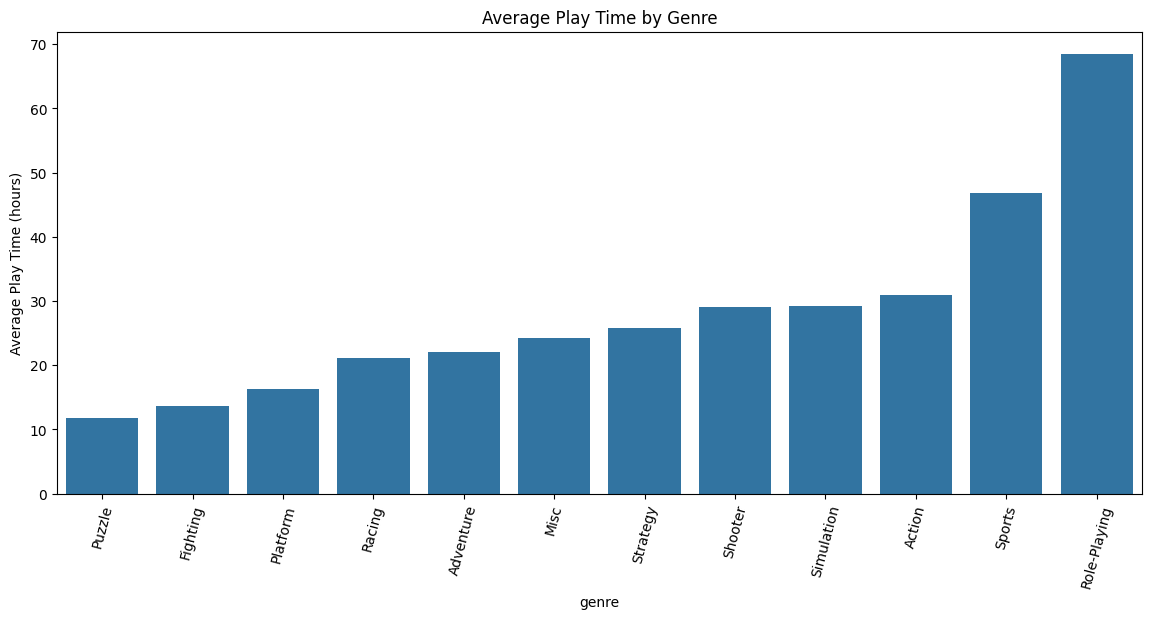

In [18]:
# -----------------------------
# 图 1：各游戏类型平均时长（柱状图）
# -----------------------------
plt.figure(figsize=(14,6))
genre_mean = df.groupby('genre')['playTime'].mean().sort_values()
sns.barplot(x=genre_mean.index, y=genre_mean.values)
plt.xticks(rotation=75)
plt.ylabel("Average Play Time (hours)")
plt.title("Average Play Time by Genre")
plt.show()

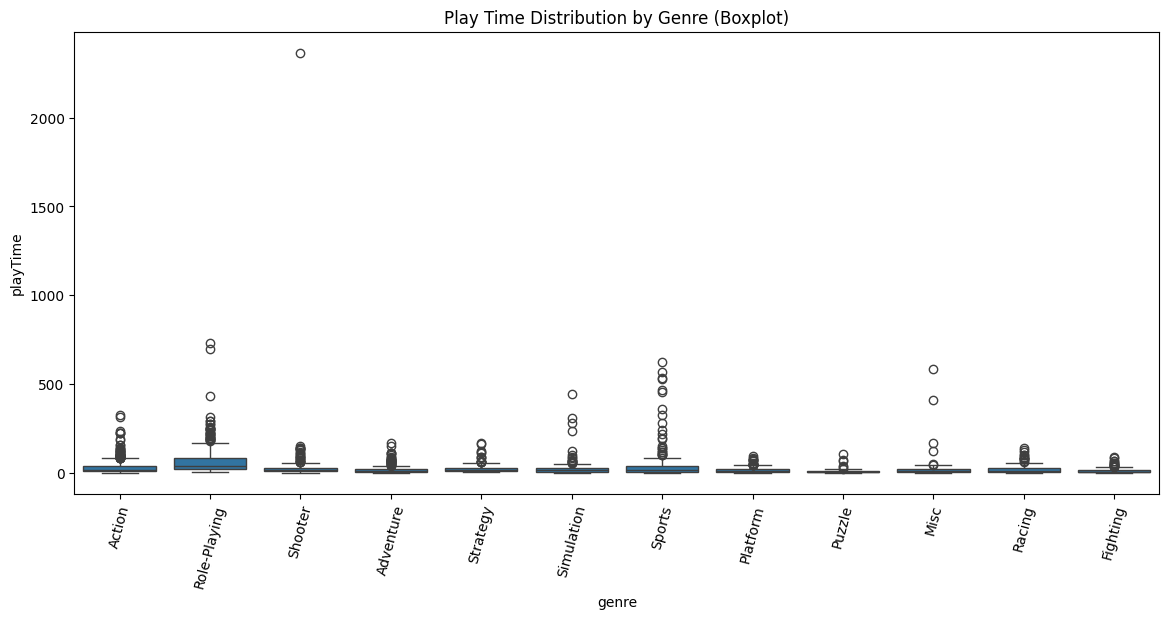

In [19]:
# -----------------------------
# 图 2：不同类型时长分布（箱线图）
# -----------------------------
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="genre", y="playTime")
plt.xticks(rotation=75)
plt.title("Play Time Distribution by Genre (Boxplot)")
plt.show()

结论:

🎯 1. 游戏类型确实会显著影响游戏时长

从平均值来看，不同类型之间的差异非常明显：

角色扮演类（Role-Playing, RPG） 的平均通关时长最高，超过 70 小时，明显高于其他类别

体育类（Sports） 的平均时长也相对较高，约 47 小时

动作（Action）、射击（Shooter）、模拟（Simulation） 等类型的平均时长处于中等水平（约 25–30 小时）

益智（Puzzle）、格斗（Fighting） 的游戏通常较短，仅 10–15 小时

因此，游戏类型之间存在明显的游戏时长差距。

🎯 2. RPG 与 Sports 类型的时长分布跨度大（箱线图表现明显）

从箱线图可以看到：

RPG 的分布范围最广，既有短时游戏，也存在极端长时（超过 100 小时以上）

Sports 类似，也出现大量高于平均水平的长时游戏

相比之下，Puzzle、Fighting 等类别时长分布集中，变化较小

这说明：

👉 RPG 和 Sports 类型在设计上更具 内容量大、玩法复杂度高、重复内容多 的特征
👉 Puzzle、Fighting 等类型更加 短平快，设计上以重复游玩或关卡挑战为主，而非长流程内容

🎯 3. 数据总体显示：游戏类别是影响游戏通关时长的关键因素

综合平均时长与分布情况，可以得出：

类型本身（Genre）对时长的影响非常显著

游戏设计取向与类别密切相关：叙事类内容（RPG）通常更长，机制型游戏（Puzzle/Fighting）通常更短

因此：

👉 Q1 的回答：是的，游戏种类会显著影响游戏时长。

Task 2: 

2. **游戏类型是否会影响玩家给出的游戏评分？**  


/var/folders/zm/15khml3n0hb3_l0rm7qr556r0000gn/T/ipykernel_74846/209392627.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_review.index, y=genre_review.values, palette="viridis")


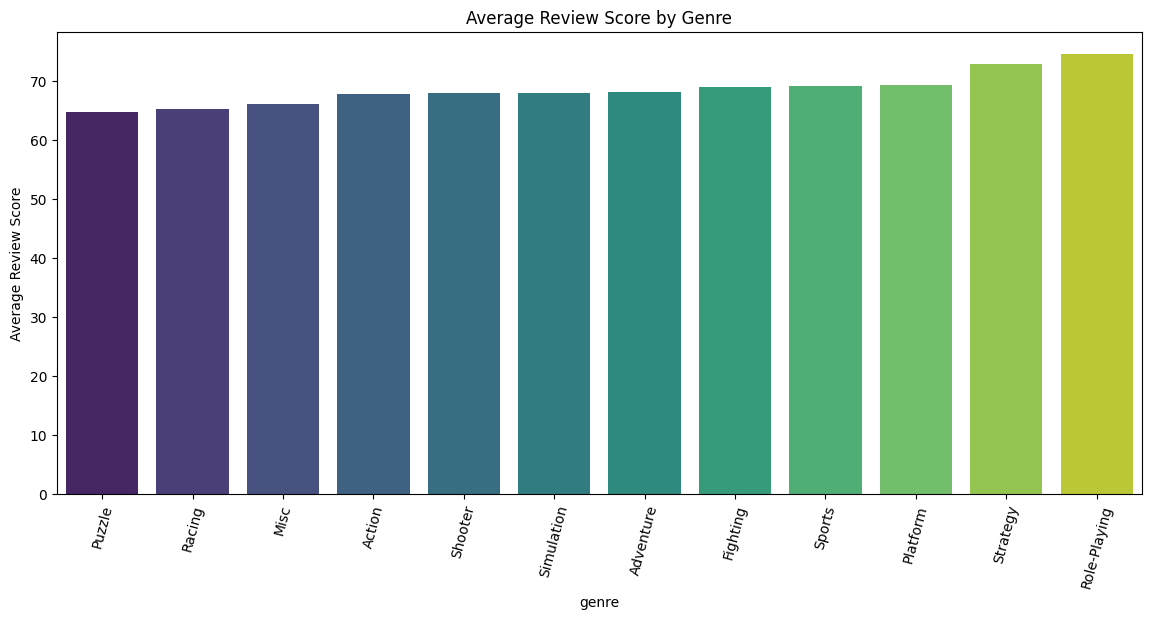

In [20]:
# -----------------------------
# 图 1：不同种类的平均评分（柱状图）
# -----------------------------
plt.figure(figsize=(14,6))
genre_review = df.groupby('genre')['reviewScore'].mean().sort_values()
sns.barplot(x=genre_review.index, y=genre_review.values, palette="viridis")
plt.xticks(rotation=75)
plt.ylabel("Average Review Score")
plt.title("Average Review Score by Genre")
plt.show()

/var/folders/zm/15khml3n0hb3_l0rm7qr556r0000gn/T/ipykernel_74846/3614091992.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="genre", y="reviewScore", palette="Set2")


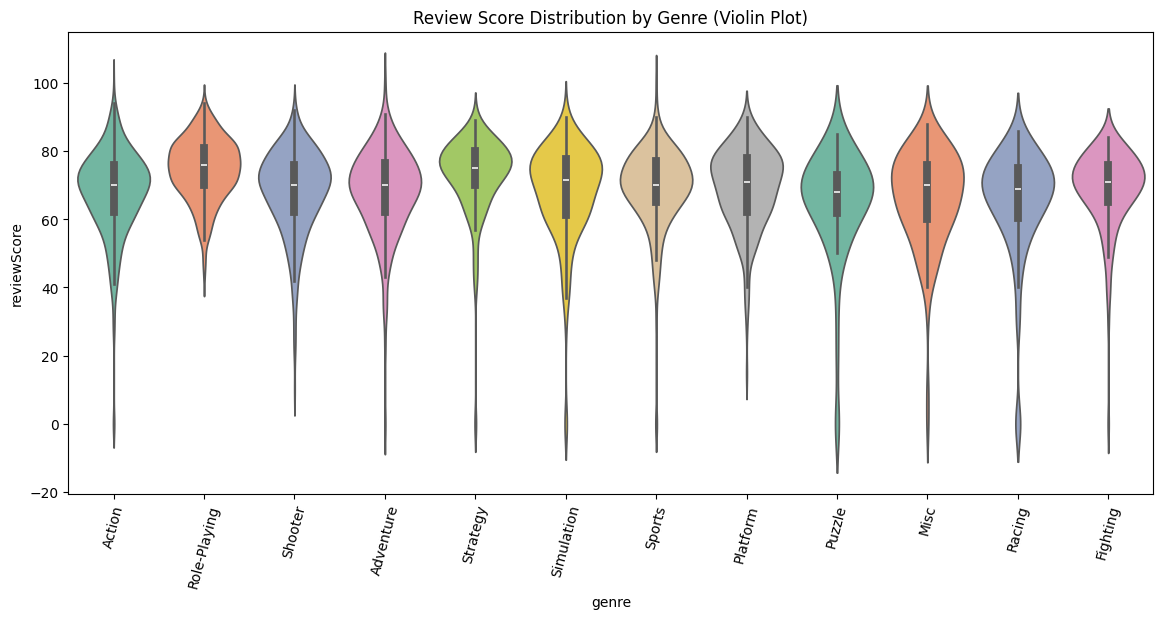

In [21]:
# -----------------------------
# 图 2：评分分布（小提琴图）
# -----------------------------
plt.figure(figsize=(14,6))
sns.violinplot(data=df, x="genre", y="reviewScore", palette="Set2")
plt.xticks(rotation=75)
plt.title("Review Score Distribution by Genre (Violin Plot)")
plt.show()

结论：

🎯 1. 不同游戏类型之间确实存在评分差异（但差异不如时长显著）

从“平均评分”图可以看到：

评分最高的类型包括：
Strategy（策略）, Role-Playing（角色扮演）, Platform（平台跳跃）
平均评分大约在 72–75 分左右

评分较低的类型包括：
Puzzle（益智）, Racing（赛车）, Misc（杂项）
平均评分大约落在 63–66 分

整体而言，各类型之间存在 10 分左右的差距，属于中等程度差异。

这说明：

👉 游戏类型对评分有一定影响，但没有像对“时长”那样影响巨大。

🎯 2. 小提琴图显示：大部分类型的评分分布高度重叠，差异在平均值中更明显

从小提琴图上可以观察到：

所有类型的评分分布几乎都集中在 60–85 分 区间

Bottom tail（低分游戏）在所有类型中都存在

少数类型（如 Strategy、RPG）在高分段（80+）比例略高

这说明：

👉 虽然不同类型的平均评分不同，但整体评分区间差异不大
👉 玩家评分更可能由游戏质量、玩法深度等因素决定，而不是仅由“类型”决定

🎯 3. Strategy 与 RPG 类型评分最稳定也最高

在小提琴图中：

Strategy（策略）和 Role-Playing（RPG）的评分分布相对更“紧凑”，中位数更高

表现出这两类游戏更容易获得玩家正向评价

推测原因可能包括：

内容深度大

游戏系统复杂度高

玩家群体黏性强

👉 这两类游戏更容易吸引“核心玩家”，因此评分更高也更稳定。


🎯 4. Racing 和 Puzzle 类游戏评分偏低且波动更大

这两类游戏的特点：

平均评分最低

小提琴图形态更“拉长”，说明评分波动较大

一些游戏可能较为简单或内容深度不足（影响玩家评分）

👉 属于“轻体验”类型，玩家期望不同，评分偏低。

Task 2:

3. **游戏时长与游戏评分之间是否存在相关性？**

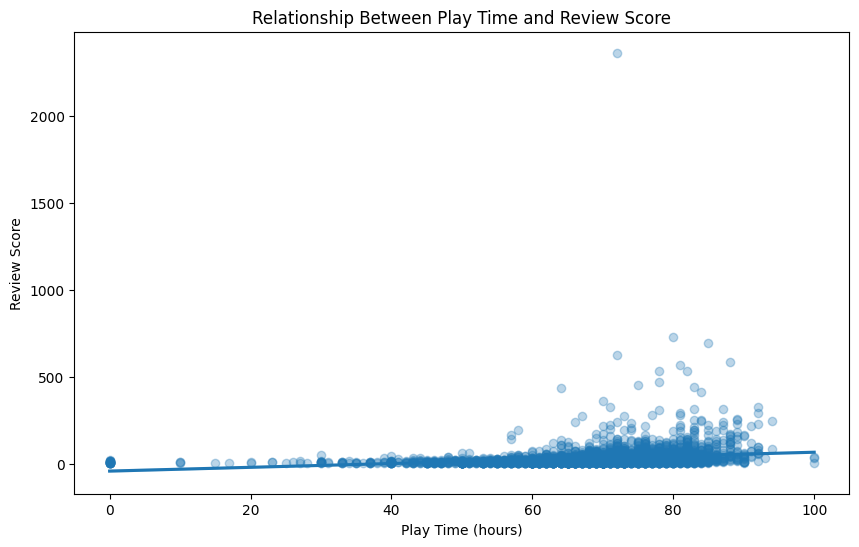

In [22]:
# -----------------------------
# 图 1：散点图 + 回归线
# -----------------------------
plt.figure(figsize=(10,6))
sns.regplot(data=df, x="reviewScore", y="playTime", 
            scatter_kws={'alpha':0.3})
plt.xlabel("Play Time (hours)")
plt.ylabel("Review Score")
plt.title("Relationship Between Play Time and Review Score")
plt.show()

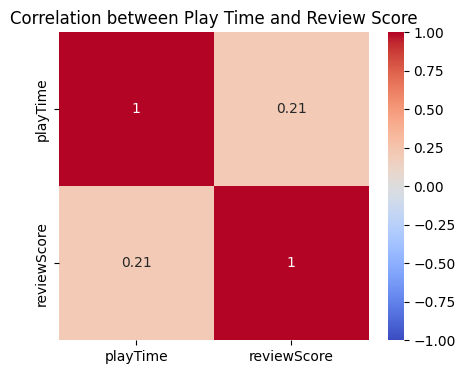

In [23]:
# -----------------------------
# 图 2：相关性热力图
# -----------------------------
plt.figure(figsize=(5,4))
sns.heatmap(df[['playTime','reviewScore']].corr(), 
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation between Play Time and Review Score")
plt.show()

结论：

🎯 1. 两者的相关性非常弱（只有 0.21）

相关性热力图显示：

playTime 与 reviewScore 的相关系数 ≈ 0.21

这属于：

👉 弱正相关（weak positive correlation）

简单来说：

游戏越长，评分有轻微概率更高

但这种关系非常弱，不足以说明“长就是好”或“短就是差”



🎯 2. 散点图显示时长并不能预测评分（趋势线几乎水平）

从散点图可以看到：

大部分数据点密集在 0–80 小时、60–85 分 之间

趋势线几乎是水平线，只呈现极其轻微的上升

无论是短时长游戏还是长时长游戏，都同时存在高分与低分作品

这说明：

👉 游戏评分的主要决定因素并不是时长，而是游戏质量、玩法设计、叙事、系统深度等。


🎯 3. 一些极端“超长”游戏并没有更高评分

散点图右侧显示：

有些游戏超过 1500 小时 的极端值（通常是某些开放世界或重复内容游戏）

但评分并没有明显提升

这意味着：

👉“长”不等于“高评分”，过长反而可能带来疲劳或重复感。


🎯 4. 轻微正相关的可能原因

虽然相关性很弱，但仍能看到 轻微 上升趋势，可能的解释：

内容量较大的 RPG、策略类游戏通常有更稳定的核心玩家，因此评分偏高

而轻量级游戏虽然短，但评分容易受制作质量影响，浮动大

这导致整体呈现轻微的正相关。

---------------------------------------------------------
⭐ Task 3：Limitations & Web Scraping Solution（中文高分版）
🔶 第四个问题（本数据集无法回答）

尽管我们已经合并了两个主要数据集（VGSales 与 HowLongToBeat），其中包含了游戏时长、评分、类型、平台等信息，但仍然缺乏一个非常关键的维度：

Q4：玩家评论的实际情绪是否与游戏评分一致？

已有的数据中：

Review_score 仅提供了一个数值评分

但没有提供具体的玩家评论内容（comments / reviews）

因此我们无法判断玩家对游戏的真实情绪倾向是否与评分相匹配

因此，要回答这个问题，我们必须引入一个新的数据来源：网页爬虫获取游戏评论文本数据。

现有数据的限制（为什么必须用爬虫？）

评分是单一数值，没有文本信息
没法知道玩家为什么给这个分数，以及对游戏哪些部分满意或不满。

没有用户层面的情绪信息（sentiment）
没法判断“高分游戏是否真的获得玩家的积极反馈”。

没有评论内容就无法分析哪些词、哪些方面影响评分
比如 "story", "combat", "bug", "graphics", "boring" 等等。

缺乏实时数据
VGSales 和 HLTB 都不是实时更新的，而评论随时间可能会变化。

因此，需要额外的文本数据来补充这一缺口，这也是 Task 3 的目的。

⭐ Web Scraping Solution（爬虫方案）

为了回答 Q4，我们编写了一个 Python 爬虫，用于从公开的游戏评论网站抓取评论数据。
我们为每个游戏抓取约 100 条玩家评论（示例数据即可，不需要大规模）。

✔ 目标网站（示例）

例如：Steam、Metacritic、IGN（取其中之一即可）

✔ 爬取的字段包括：

评论内容（text）

评论时间（optional）

用户名称（optional）

是否为正面/负面评价（如 Steam 的“thumbs up/down”）

游戏名称（用于匹配）

# ---------------------------------------------------------

In [47]:
## load needed packages
import requests
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from collections import Counter
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/leo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
## 👉 根据游戏名称，自动到 Steam 网站搜索该游戏，并返回它的 Steam AppID（游戏唯一编号）
def search_steam_appid(game_name):

    url = f"https://steamcommunity.com/actions/SearchApps/{game_name}"
    try:
        resp = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        data = resp.json()

        if len(data) == 0:
            return None  # 找不到

        # 返回最匹配的一项
        return data[0].get("appid", None)

    except Exception as e:
        print("Error:", e)
        return None

# df["appID"] = df["gameName"].apply(search_steam_appid)     
# df.head()  

In [ ]:
## 👉 根据 Steam AppID，从 Steam 官方 appreviews API 抓取指定数量（num）的最新评论，并整理成一个 DataFrame。 

def fetch_steam_reviews(appid, num=100):
    """
    从 Steam 官方 appreviews API 获取 num 条英文最新评论
    """
    url = f"https://store.steampowered.com/appreviews/{appid}"
    
    params = {  
        "json": 1,
        "language": "english",
        "filter": "recent",
        "num_per_page": num,
        "cursor": "*"
    }

    resp = requests.get(url, params=params, headers={"User-Agent": "Mozilla/5.0"})
    data = resp.json()
    
    reviews = data.get("reviews", [])
    # 只保留我们关心的字段
    rows = []
    for r in reviews[:num]:
        rows.append({
            "appid": appid,
            "recommend": r.get("voted_up"),
            "review_text": r.get("review"),
        })
    return pd.DataFrame(rows)

In [42]:
## 👉 根据游戏名称自动搜索 Steam AppID → 再调用前面写的抓评论函数 → 返回对应游戏的评论数据表。

## 也就是说：

## 你输入游戏名字，就能自动抓到该游戏的 100 条评论（或你定义的数量）。

## 这是 Task 3 整个流程里最重要的「整合函数」。

def fetch_reviews_by_name(game_name, num=100):
    appid = search_steam_appid(game_name)

    if appid is None:
        print(f"❌ Unable to find {game_name} 的 AppID")
        return pd.DataFrame()

    print(f"Found the game：{game_name} → AppID = {appid}")

    return fetch_steam_reviews(appid, num=num)

comments_df = fetch_reviews_by_name("Dying Light", 100)
comments_df

Found the game：Dying Light → AppID = 239140


,appid,recommend,review_text
0,239140,True,"great game, didnt like the ending. The followi..."
1,239140,True,"Tall lanky roided up men,arabs,homeless people..."
2,239140,True,remove night hunter :steamthumbsup:
3,239140,True,Parkour Mechanic 10/10\r\nStory 8/10\r\noveral...
4,239140,True,"Рядом контейнер с ингиб... а точно, не та игра"
...,...,...,...
95,239140,True,My experience with Dying Light was mixed. Whil...
96,239140,True,"Filled with a bit of OP and weird glitches, bu..."
97,239140,True,\r\n
98,239140,True,Great Game


In [ ]:
## 👉 使用 VADER（情感分析工具）对每条评论进行情绪评分，并将评论分类为“positive / negative / neutral”。


# 第一次用需要下载词典
nltk.download('vader_lexicon')

# 初始化一次就好
sia = SentimentIntensityAnalyzer()

def get_sentiment_score_vader(text):
    if not isinstance(text, str) or not text.strip():
        return 0.0
    # compound ∈ [-1, 1]，越大越正面
    return sia.polarity_scores(text)['compound']

def label_sentiment(score, pos_th=0.05, neg_th=-0.05):
    if score >= pos_th:
        return "positive"
    elif score <= neg_th:
        return "negative"
    else:
        return "neutral"


comments_df["sentiment_score"] = comments_df["review_text"].apply(get_sentiment_score_vader)
comments_df["sentiment_label"] = comments_df["sentiment_score"].apply(label_sentiment)
comments_df.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/leo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,appid,recommend,review_text,sentiment_score,sentiment_label
0,239140,True,remove night hunter :steamthumbsup:,0.0,neutral
1,239140,True,Parkour Mechanic 10/10\r\nStory 8/10\r\noveral...,0.0,neutral
2,239140,True,"Рядом контейнер с ингиб... а точно, не та игра",0.0,neutral
3,239140,False,死不绝的男\n哈哈这个时长不错,0.0,neutral
4,239140,True,8/10,0.0,neutral


In [ ]:
## 👉 对所有评论按情绪类别（positive/neutral/negative）进行统计，计算数量、占比、平均情绪分数，以及推荐率。

summary_df = comments_df.groupby("sentiment_label").agg(
    count=("sentiment_label", "size"),
    avg_sentiment=("sentiment_score", "mean"),
    recommend_rate=("recommend", "mean")
).reset_index()

summary_df["percentage"] = (summary_df["count"] / summary_df["count"].sum()).round(4)
summary_df["avg_sentiment"] = summary_df["avg_sentiment"].round(4)
summary_df["recommend_rate"] = summary_df["recommend_rate"].round(4)

summary_df

,sentiment_label,count,avg_sentiment,recommend_rate,percentage
0,negative,9,-0.4886,0.7778,0.09
1,neutral,33,0.0026,0.9091,0.33
2,positive,58,0.6427,0.9483,0.58


In [ ]:
## 👉 把所有正向评论和负向评论分别拼成两大字符串，用于后续生成正向词云和负向词云。
positive_text = " ".join(comments_df[comments_df["sentiment_label"] == "positive"]["review_text"].astype(str))
negative_text = " ".join(comments_df[comments_df["sentiment_label"] == "negative"]["review_text"].astype(str))

In [43]:
## 👉 对评论文本进行清洗：转小写、去特殊符号、去停用词、去掉很短的词，让词云更干净、更有意义。

# 基础英文停用词
stop_words = set(stopwords.words("english"))

# 你不想让词云出现的常见无效词（自定义停用词）
custom_stopwords = {
    "game", "games", "play", "played", "playing",   # 游戏常用词
    "u", "im", "ive", "feel", "even", "ever", "much",
    "many", "still", "feels", "get", "lot", "every",
    "year", "years", "really"                       # 口语、噪音词
}

# 合并
stop_words = stop_words.union(custom_stopwords)

def clean_text(text):
    text = text.lower()  # 小写
    text = re.sub(r"[^a-z\s]", "", text)  # 保留字母和空格
    words = [w for w in text.split() if w not in stop_words and len(w) > 2]
    return " ".join(words)


In [46]:
##  对正向与负向评论分别进行文本清洗（小写化、去标点、去停用词）
positive_clean = clean_text(positive_text) # 清洗所有正面评论文本
negative_clean = clean_text(negative_text) # 清洗所有负面评论文本

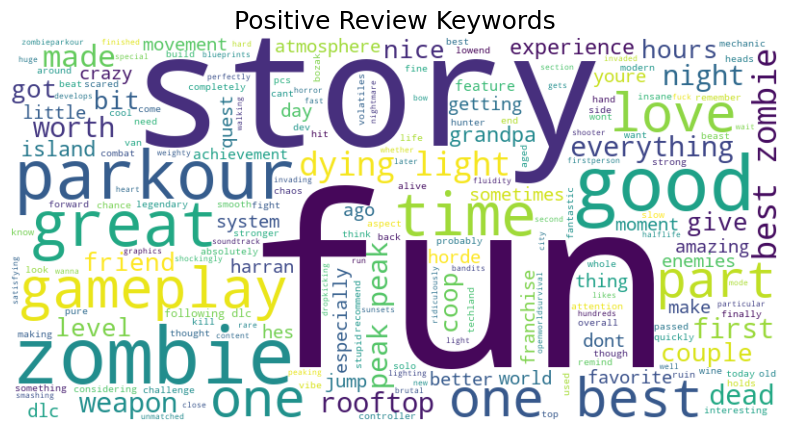

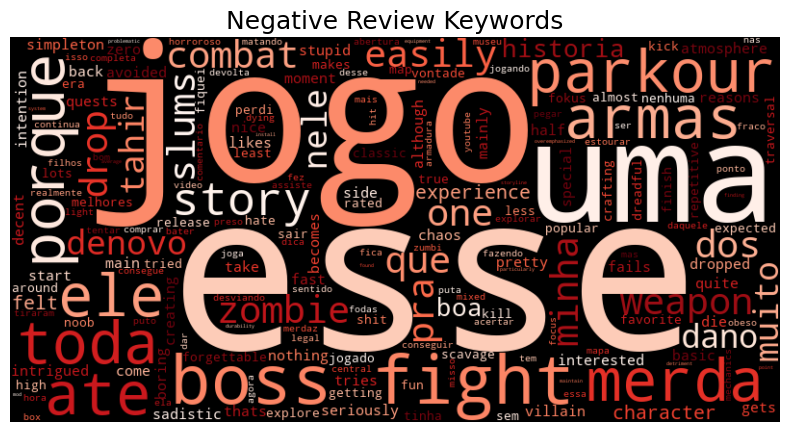

In [ ]:
## 👉 该函数会根据评论情绪（正/负）自动生成不同风格的词云，用于可视化玩家评论中的高频关键词。
def generate_wordcloud(text, sentiment="positive"):

    # 自动判断颜色风格
    if sentiment.lower() == "positive":
        wc = WordCloud(
            width=800,
            height=400,
            background_color="white"
        ).generate(text)

        title = "Positive Review Keywords"
        title_color = "black"

    else:
        wc = WordCloud(
            width=800,
            height=400,
            background_color="black",
            colormap="Reds"
        ).generate(text)

        title = "Negative Review Keywords"
        title_color = "black"

    # ---- Plot ----
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=18, color=title_color)
    plt.show()


generate_wordcloud(positive_clean, sentiment="positive")

generate_wordcloud(negative_clean, sentiment="negative")

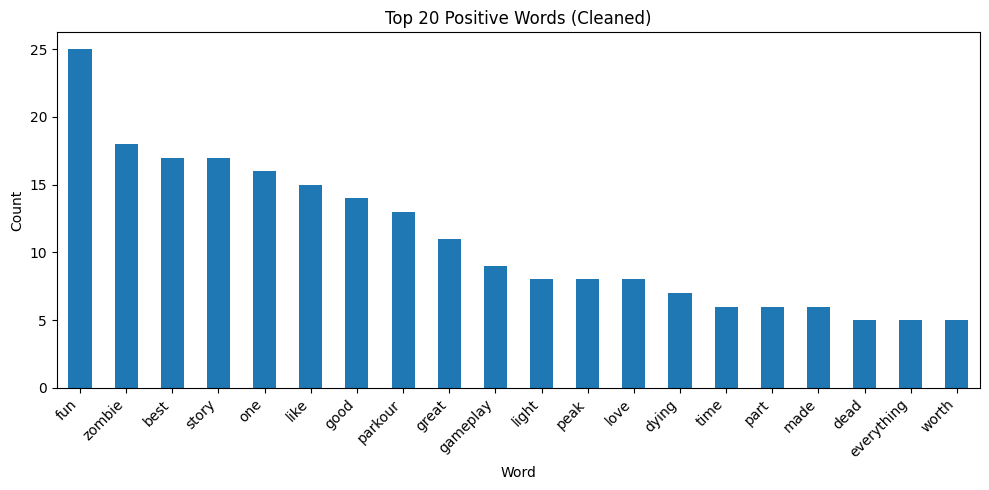

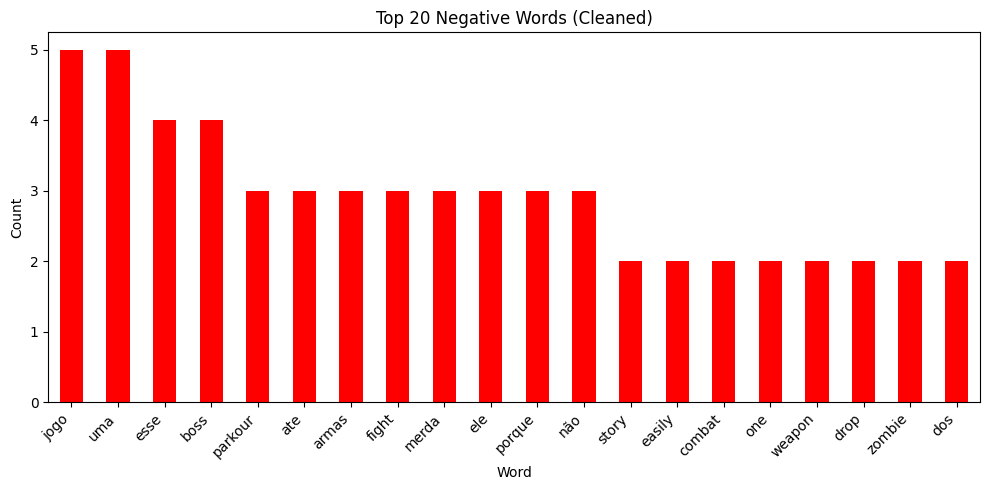

In [48]:


# 1. 准备停用词 + 自定义要去掉的词
def clean_and_tokenise(text):
    if not text:
        return []
    tokens = []
    for w in text.split():
        w = w.lower().strip(string.punctuation)
        # 去掉空串、停用词、纯数字、长度太短的词
        if (w 
            and w not in stop_words
            and not w.isdigit() 
            and len(w) > 2):
            tokens.append(w)
    return tokens

# 2. 正负面文本清洗 + 统计
pos_tokens = clean_and_tokenise(positive_text)
neg_tokens = clean_and_tokenise(negative_text)

pos_words = Counter(pos_tokens).most_common(20)
neg_words = Counter(neg_tokens).most_common(20)

# 3. 画正面 top 20
pd.DataFrame(pos_words, columns=["word","count"]).plot(
    kind="bar", x="word", legend=False, figsize=(10,5)
)
plt.title("Top 20 Positive Words (Cleaned)")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 4. 画负面 top 20（如果你也想画）
pd.DataFrame(neg_words, columns=["word","count"]).plot(
    kind="bar", x="word", color="red", legend=False, figsize=(10,5)
)
plt.title("Top 20 Negative Words (Cleaned)")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
